nymar 39.0
alavarez 40.0
di maria 35.0
messi 33.0
lewandowski 45.0
rashford 38.0
de jong 52.0
fati 48.0
pedri 46.0
messi


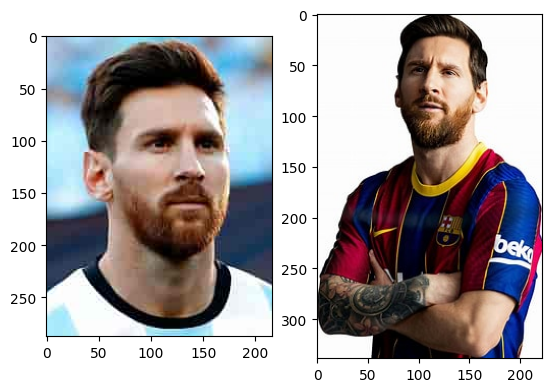

In [1]:
import cv2 
import os
import matplotlib.pyplot as plt
path=r'/kaggle/input/player-images'
messi=cv2.imread('/kaggle/input/messi-images/messi.jpg')
detect=cv2.ORB_create()
value=1000
player_image=''
for image in os.listdir(path):
    player=cv2.imread(path+os.sep+image)
    key1,des1=detect.detectAndCompute(messi,None)
    key2,des2=detect.detectAndCompute(player,None)
    matcher=cv2.BFMatcher(cv2.NORM_HAMMING,crossCheck=True)
    match=matcher.match(des1,des2)
    match=sorted(match,key=lambda x:x.distance)
    if match[0].distance < value:
        value=match[0].distance
        player_image=image.split('.')[0]
    print(image.split('.')[0],match[0].distance)
print(player_image)

fig, (ax1, ax2) = plt.subplots(1, 2)

# Show the images in the subplots
result_image=cv2.cvtColor(cv2.imread(path+'/'+player_image+'.jpg'),cv2.COLOR_BGR2RGB)
ax1.imshow(cv2.cvtColor(messi,cv2.COLOR_BGR2RGB))
ax2.imshow(result_image)

# Show the plot
plt.show()